In [1]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex=True)

from __future__ import division
import sympy as sym
from sympy import *

%matplotlib inline
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font',**{'family':'serif','size'   : 12})

In [2]:
from qutip import *

In [3]:
# Test 3d harmonic oscilator
# First pick an initial state which is a 3d harmonic state tensor ground and excited state

Nx = 4                   # Dimension of x-harmonic oscillator
Ny = 6                   # Dimension of y-harmonic oscillator
Nz = 8                   # Dimension of z-harmonic oscillator
g = basis(2,0)          # Ground state
e = basis(2,1)          # Excited state
x = fock(Nx, Nx-1)      # x-harmonic oscillator
y = fock(Ny, Ny-1)      # y-harmonic oscillator
z = fock(Nz, Nz-1)      # z-harmonic oscillator

# Destruction operators in 3d
a_x = destroy(Nx)
a_y = destroy(Ny)
a_z = destroy(Nz)

# Number operator
H_N = tensor(a_x.dag() * a_x, qeye(Ny), qeye(Nz)) + tensor(qeye(Nx), a_y.dag() * a_y, qeye(Nz)) + tensor(qeye(Nx), qeye(Ny), a_z.dag() * a_z)

# Wavefunction in 3d
psi0 = tensor(x, y, z)

# Compute expectation of number operator
print expect(H_N, psi0)

15.0


In [4]:
# Test random generate 3d harmonic oscillator state from thermal distribution
# I need to first choose from expectation of number operators, and initialize the fock state

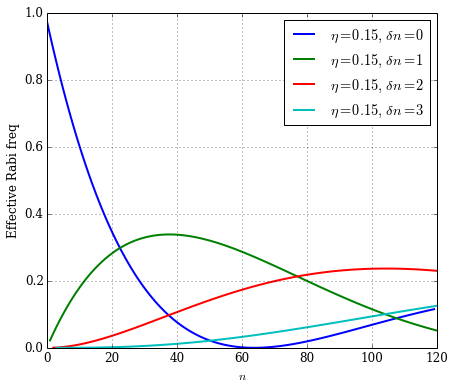

In [5]:
# Test the effective Rabi frequency first
# To save different delta n
import matplotlib.gridspec as gridspec
figure = plt.figure(figsize=(7, 6))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)
ax1 = plt.subplot(gs[0,0]) 

def plot_sb_mat(N, eta, dn):
    t = 5    # To avoid numerical errors
    a = (1j * eta * (destroy(N + t) + destroy(N + t).dag())).expm()
    x = range(dn, N + t)
    #y = [((fock(N, i).dag() * a * fock(N, i - dn)).norm()) ** 2 for i in x]
    #Q.matrix_element(bra,ket)
    y = [(abs(a.matrix_element(fock(N + t, i), fock(N + t, i - dn)))) ** 2 for i in x]
    ax1.plot(x[: N], y[: N], label = '$\eta = %.2f, \ \delta n = % d$' % (eta, dn), linewidth = 2, linestyle = '-')
    ax1.set_xlim(0, N)
    #print(y)

plot_sb_mat(120, 0.15, 0)
plot_sb_mat(120, 0.15, 1)
plot_sb_mat(120, 0.15, 2)
plot_sb_mat(120, 0.15, 3)

ax1.set_xlabel("$n$")
ax1.set_ylabel("Effective Rabi freq")
ax1.legend(loc = 1)
ax1.grid(1)

# Several constants

In [6]:
from __future__ import division, print_function, unicode_literals

# Basic constants
pi = 3.1415926
c = 299792458
h = 6.62606957e-34
hbar = h / 2 / pi
k_B = 1.3806488e-23
m_e = 9.10938291e-31
m_p = 1.672621898e-27
mu_0 = 4e-7 * pi
epsilon_0 = 1 / c**2 / mu_0
E = 1.602176565e-19
N_A = 6.02214129e+23


# Mass of Sr-88, Sr-87, Sr-86, Sr-84
M88 = 1.459706905272492E-25  
M87 = 1.4431557366419E-25  
M86 = 1.42655671117996E-25
M84 = 1.3934150821E-25
M = M88

In [7]:
# Test Heff in 1d

Nx = 12                 # Dimension of x-harmonic oscillator
omega_x = 2* pi * 200   # In units of kHz
delta = -2 * pi * 200   # In units of kHz
omega = 2 * pi * 200    # In units of kHz
gamma = 2 * pi * 7      # In units of kHz
eta = 0.2
g = basis(2,0)          # Ground state
e = basis(2,1)          # Excited state
x = fock(Nx, 10)        # x-harmonic oscillator

# Destruction operators in 1d
a_x = destroy(Nx)

# H_eff / hbar, otherwise too small, too many floats
H_eff = tensor(omega_x * (a_x.dag() * a_x + 0.5), qeye(2)) - tensor(qeye(Nx), 0.5 * delta * sigmaz()) + omega * 0.5 * (tensor((1j * eta * (a_x + a_x.dag())).expm(), sigmap()) + tensor((-1j * eta * (a_x + a_x.dag())).expm(), sigmam())) - 1j * 0.5 * gamma * tensor(qeye(Nx), sigmap() * sigmam())
H = tensor(omega_x * (a_x.dag() * a_x + 0.5), qeye(2)) - tensor(qeye(Nx), 0.5 * delta * sigmaz()) + omega * 0.5 * (tensor((1j * eta * (a_x + a_x.dag())).expm(), sigmap()) + tensor((-1j * eta * (a_x + a_x.dag())).expm(), sigmam()))


# Wavefunction in 1d, start from all in ground state
psi0 = tensor(x, g)

# Compute expectation value
print (expect(H_eff, psi0))

# Compute evolution
# print (H_eff, psi0)

(13823.00744-21.9911482j)


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


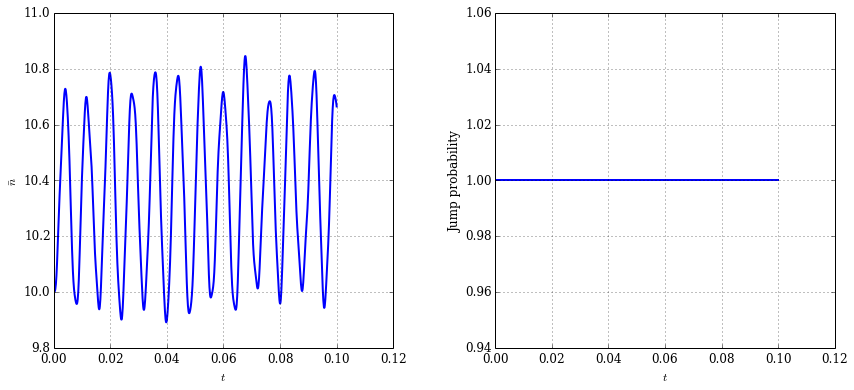

In [8]:
# Let Heff evolution until random number r

from numpy import linspace
from numpy.random import uniform

r = uniform(0, 1)
dt = 0.1    # Time step
times = linspace(0.0, dt, 1000)
result = mesolve(H_eff, psi0, times, [], [tensor(a_x.dag() * a_x, qeye(2)), tensor(qeye(Nx), qeye(2))])

figure = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.3,hspace=0.4)
ax1 = plt.subplot(gs[0,0]) 
ax1.plot(result.times, result.expect[0], linewidth = 2, linestyle = '-');
#ax1.plot(result.times, 1 - result.expect[1]);

ax1.set_xlabel("$t$")
ax1.set_ylabel(r"$\bar{n}$")
ax1.legend(loc = 1)
ax1.grid(1)

ax2 = plt.subplot(gs[0,1]) 
ax2.plot(result.times, result.expect[1], linewidth = 2, linestyle = '-');

ax2.set_xlabel("$t$")
ax2.set_ylabel("Jump probability")
ax2.legend(loc = 1)
ax2.grid(1)

10.0%. Run time:  77.66s. Est. time left: 00:00:11:38
20.0%. Run time: 153.53s. Est. time left: 00:00:10:14
30.0%. Run time: 222.13s. Est. time left: 00:00:08:38
40.0%. Run time: 310.46s. Est. time left: 00:00:07:45
50.0%. Run time: 399.48s. Est. time left: 00:00:06:39
60.0%. Run time: 490.90s. Est. time left: 00:00:05:27
70.0%. Run time: 589.61s. Est. time left: 00:00:04:12
80.0%. Run time: 688.82s. Est. time left: 00:00:02:52
90.0%. Run time: 786.82s. Est. time left: 00:00:01:27
100.0%. Run time: 885.83s. Est. time left: 00:00:00:00
Total run time: 885.90s


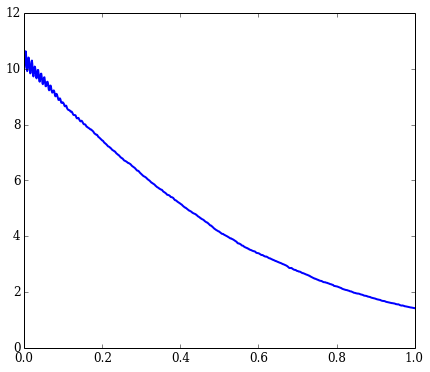

In [17]:
# Quantum jump method
# It seems to be very slow

from numpy import linspace
from numpy.random import uniform

dt = 1    # Time step
times = linspace(0.0, dt, 1000)
u = 0.5
result = mcsolve(H, psi0, times, [sqrt(gamma) * tensor((1j * u * eta * (a_x + a_x.dag())).expm(), sigmam())], [tensor(a_x.dag() * a_x, qeye(2))])

figure = plt.figure(figsize=(7, 6))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)
ax1 = plt.subplot(gs[0,0]) 
ax1.plot(result.times, result.expect[0], linewidth = 2, linestyle = '-');
#ax1.plot(result.times, 1 - result.expect[1]);

In [8]:
# Exact method
# This is actually much faster than the QMC method

from numpy import linspace
from numpy.random import uniform

dt = 1    # Time step
times = linspace(0.0, dt, 100)
u = 0.5
result = mesolve(H, psi0, times, [sqrt(gamma) * tensor((1j * u * eta * (a_x + a_x.dag())).expm(), sigmam())], [tensor(a_x.dag() * a_x, qeye(2))])

figure = plt.figure(figsize=(7, 6))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)
ax1 = plt.subplot(gs[0,0]) 
ax1.plot(result.times, result.expect[0], linewidth = 2, linestyle = '-');
#ax1.plot(result.times, 1 - result.expect[1]);

TypeError: Incompatible object for multiplication

[ 0.58] [ 1.]
[ 0.14  0.25 -0.09  0.45  0.56] [ 0.39746838  0.43582059  0.31727739  0.50555188  0.54390409]
[ 0.68  0.65  0.79  0.73  0.37  0.79  0.95  0.24  0.55 -0.19] [ 0.33452068  0.32854709  0.35642381  0.34447665  0.27279365  0.35642381
  0.38828293  0.24690812  0.30863515  0.16128675]
[-0.26  0.27  0.17  0.7   0.37  0.08  0.5   0.68  0.02  0.46  0.85 -0.1
  0.99  0.27  0.44  0.27  0.56 -0.26  0.08  0.66] [ 0.11988259  0.20574445  0.1895441   0.27540595  0.2219448   0.17496378
  0.24300525  0.27216588  0.16524357  0.23652511  0.29970648  0.14580315
  0.32238697  0.20574445  0.23328504  0.20574445  0.25272546  0.11988259
  0.17496378  0.26892581]


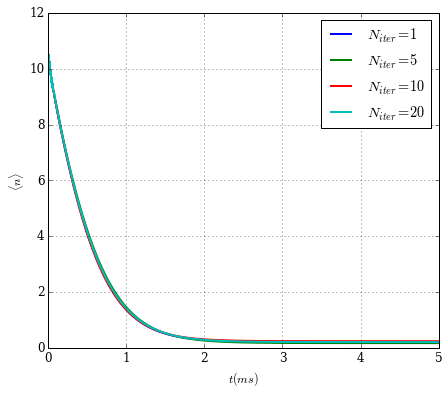

In [9]:
# Now we combine the two, we solve for each u exactly, but we generate u from the dipole distribution
# This agrees with my previous calculation and much faster

from numpy import linspace, arange, divide, sqrt
from scipy import stats

# Randomly generate u from dipole distribution
du = 0.01
u_ = arange(-1, 1, du)
p = [3 / 8 * (1 + u__) ** 2 for u__ in u_]
p = divide(p, sum(p))
dipole = stats.rv_discrete(name = 'custm', values = (range(len(p)), p))

dt = 5    # Time length
times = linspace(0.0, dt, 1000)
N_iter = [1, 5, 10, 20]
# N_iter = [1, 5]

figure = plt.figure(figsize=(7, 6))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)
ax1 = plt.subplot(gs[0,0]) 

for N_iter_ in N_iter:
    idx = dipole.rvs(size = N_iter_)
    u = u_[idx]
    q = p[idx]
    q = divide(q, sum(q)) 
    q = sqrt(q)
    print(u, q)
    result = mesolve(H, psi0, times, [sqrt(gamma) * q[i] * tensor((1j * u[i] * eta * (a_x + a_x.dag())).expm(), sigmam()) for i in range(len(u))], [tensor(a_x.dag() * a_x, qeye(2))])
    ax1.plot(result.times, result.expect[0], label = '$N_{iter} = %d$' % (N_iter_), linewidth = 2, linestyle = '-');

ax1.set_xlabel("$t (ms)$")
ax1.set_ylabel(r"$\langle n \rangle$")
ax1.legend(loc = 1)
ax1.grid(1)